In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns

#Set the font
from matplotlib import font_manager
font_dirs = ['/home/user/gzhao/Thesis/Fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
   font_manager.fontManager.addfont(font_file)
   
plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/main/uzh.mplstyle')

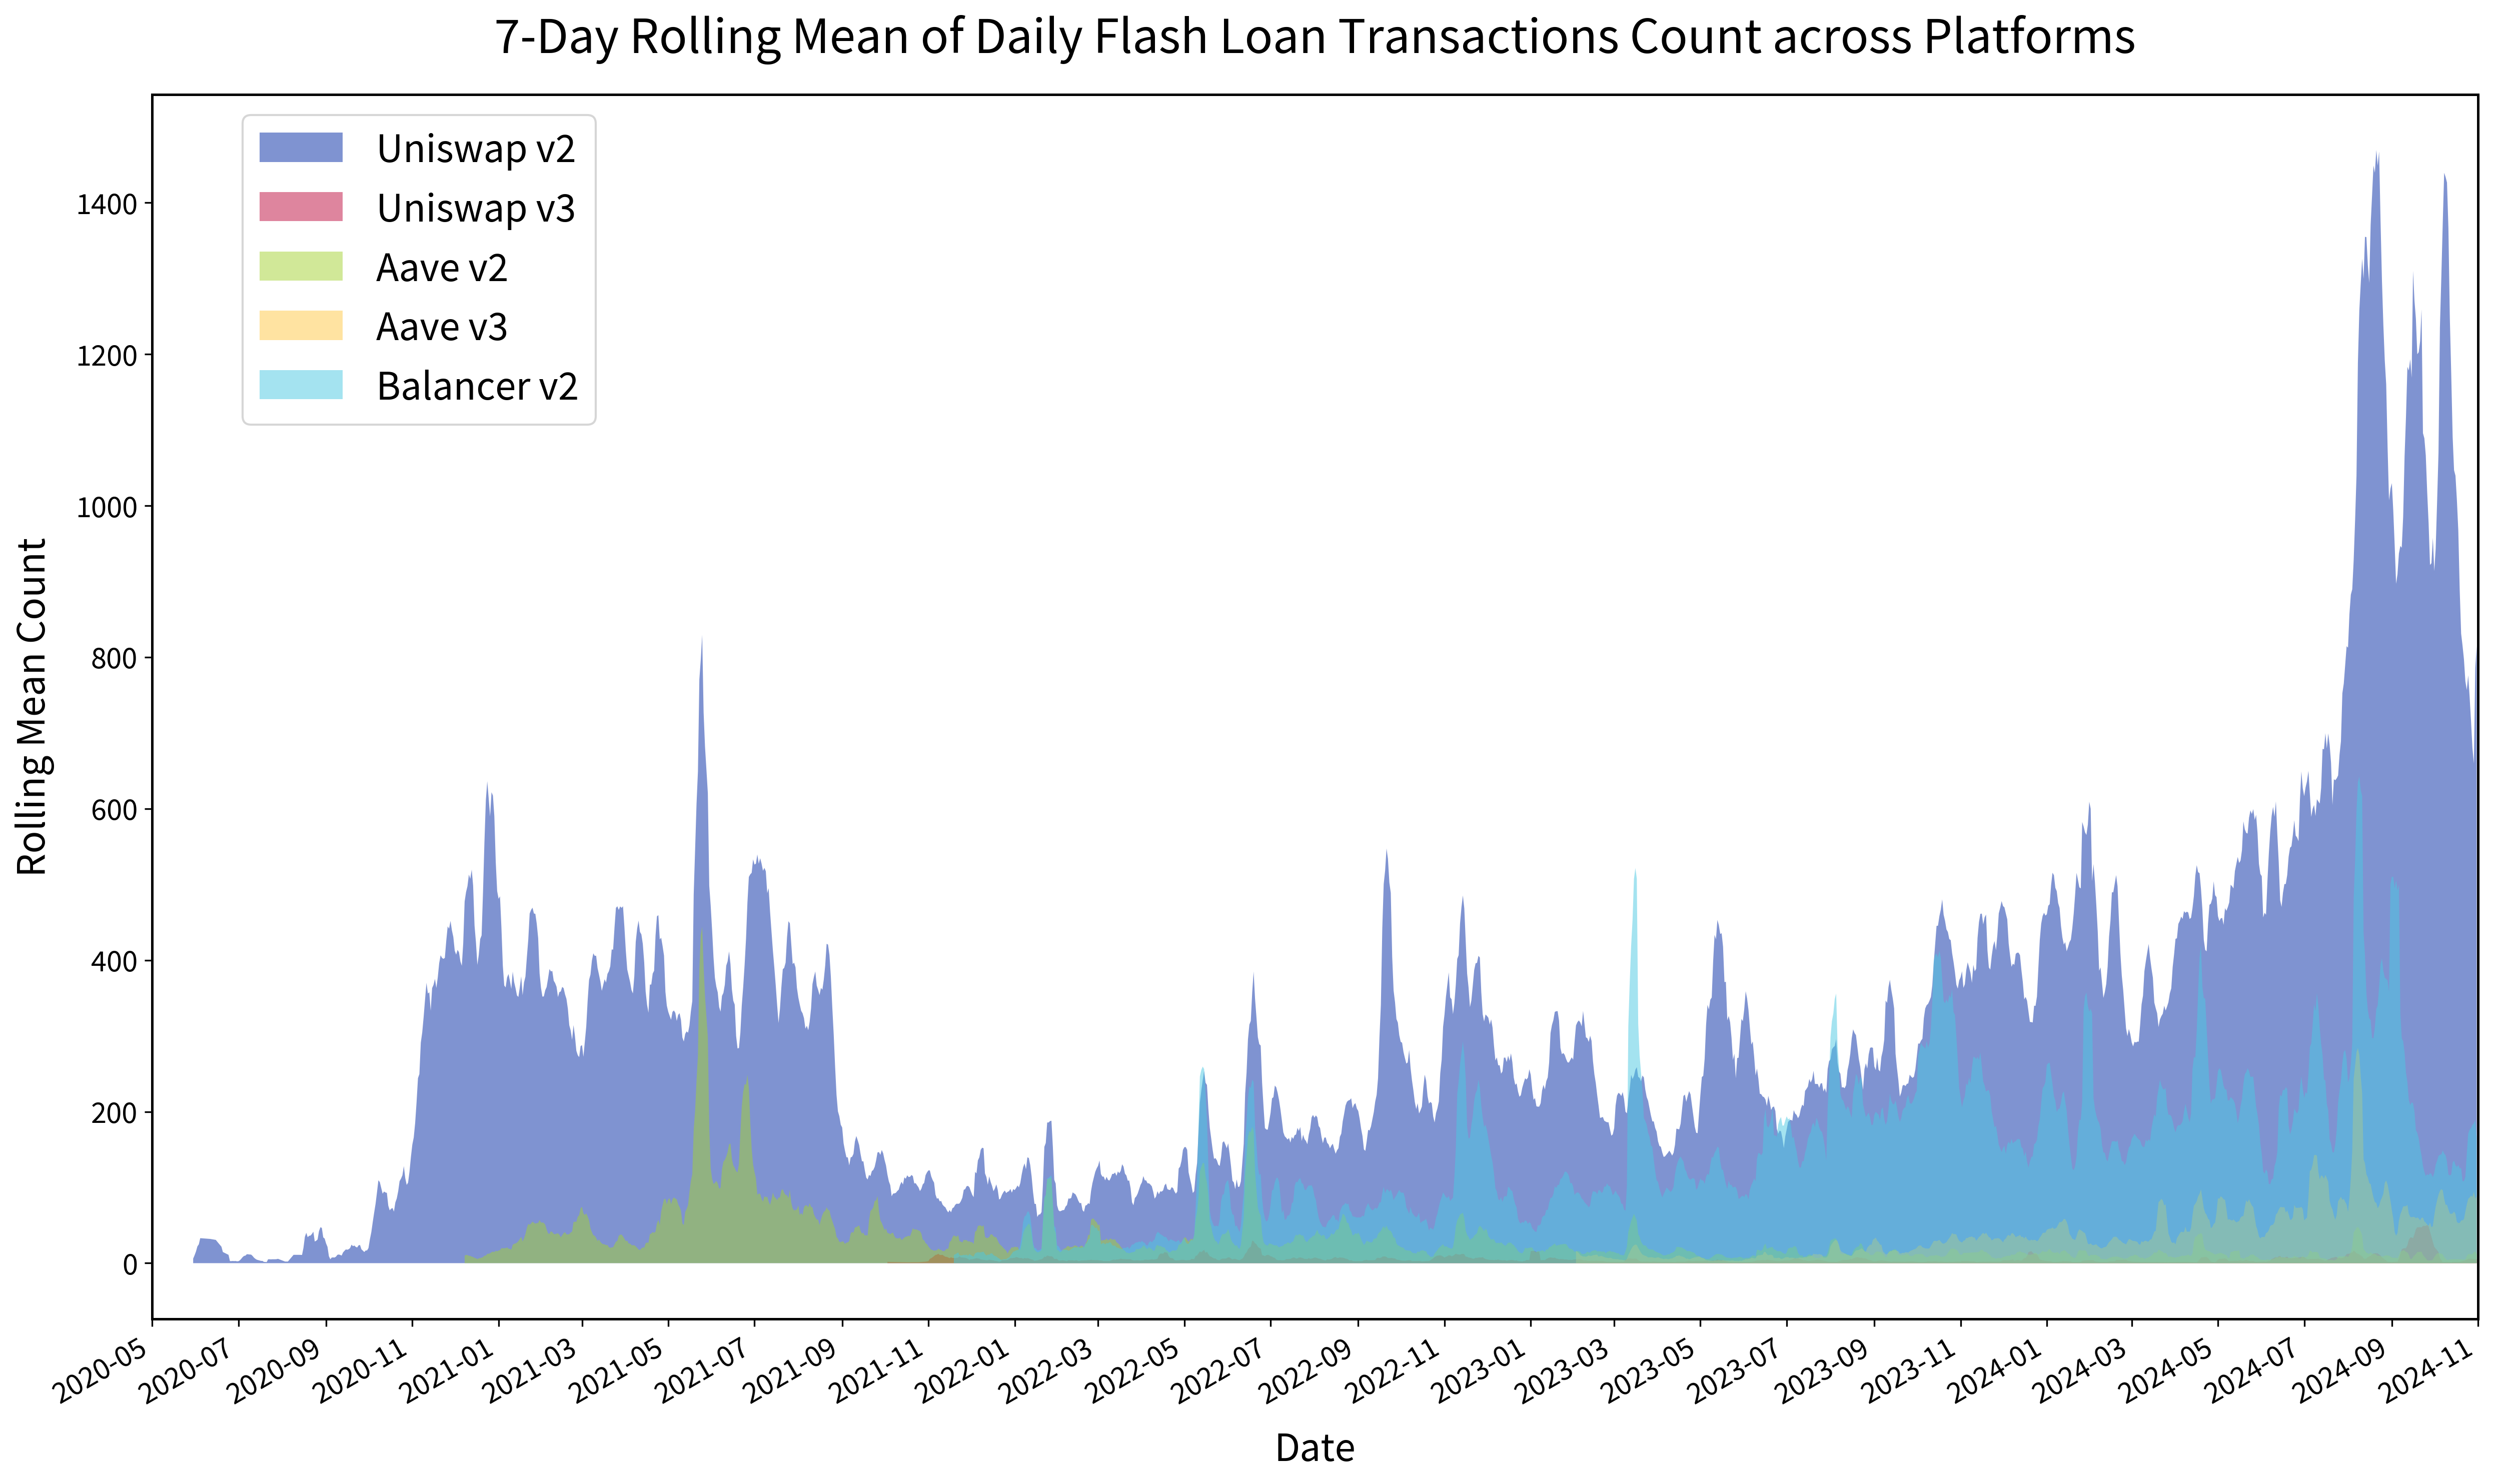

Uniswap v2:
  - Average daily flashloan count: 328.66
  - Highest daily flashloan count: 2217
Uniswap v3:
  - Average daily flashloan count: 5.94
  - Highest daily flashloan count: 84
Aave v2:
  - Average daily flashloan count: 32.21
  - Highest daily flashloan count: 954
Aave v3:
  - Average daily flashloan count: 40.79
  - Highest daily flashloan count: 738
Balancer v2:
  - Average daily flashloan count: 149.69
  - Highest daily flashloan count: 1650


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the datasets
Uniswap_v2_flashloan_count_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Uniswap_v2_flashloan_count.csv')
Uniswap_v3_flashloan_count_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Uniswap_v3_flashloan_count.csv')
Aave_v2_flashloan_count_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Aave_v2_flashloan_count.csv')
Aave_v3_flashloan_count_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Aave_v3_flashloan_count.csv')
Balancer_v2_flashloan_count_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Balancer_v2_flashloan_count.csv')

# Convert 'date' column to datetime
for df in [Uniswap_v2_flashloan_count_df, Uniswap_v3_flashloan_count_df,
           Aave_v2_flashloan_count_df, Aave_v3_flashloan_count_df,
           Balancer_v2_flashloan_count_df]:
    df['date'] = pd.to_datetime(df['date'])

# Create a new figure for the area plot
fig, ax = plt.subplots(figsize=(20, 12))  # Adjust the figure size

# Calculate rolling mean (7-day rolling mean as an example)
rolling_window = 7
for platform_df, label in zip(
        [Uniswap_v2_flashloan_count_df, Uniswap_v3_flashloan_count_df, 
         Aave_v2_flashloan_count_df, Aave_v3_flashloan_count_df, 
         Balancer_v2_flashloan_count_df],
        ['Uniswap v2', 'Uniswap v3', 'Aave v2', 'Aave v3', 'Balancer v2']):
    
    # Calculate rolling mean
    platform_df['rolling_mean'] = platform_df['daily_flash_tx_count'].rolling(window=rolling_window).mean()

    # Create area plot for rolling mean
    ax.fill_between(platform_df['date'], platform_df['rolling_mean'], label=label, alpha=0.5)

# Customize the plot
ax.set_title('7-Day Rolling Mean of Daily Flash Loan Transactions Count across Platforms',
             fontsize=25, pad=20)
ax.set_xlabel('Date', fontsize=20, labelpad=10)
ax.set_ylabel('Rolling Mean Count', fontsize=20, labelpad=10)
ax.tick_params(axis='x', rotation=45, labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# Set the x-axis range and format
start_date = pd.to_datetime("2020-05-01")
end_date = pd.to_datetime("2024-11-01")
ax.set_xlim(start_date, end_date)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
fig.autofmt_xdate()

# Position the legend in the top left, slightly towards the middle
ax.legend(loc='upper left', bbox_to_anchor=(0.03, 1), fontsize=20, ncol=1, frameon=True)

# Save the figure
fig.savefig('/home/user/gzhao/Thesis/result/daily_flashloan_rolling_mean_area_plot.pdf', facecolor='white', transparent=False)

plt.show()

# Calculate average daily flashloan and highest flashloan count for each platform
platforms = {
    "Uniswap v2": Uniswap_v2_flashloan_count_df,
    "Uniswap v3": Uniswap_v3_flashloan_count_df,
    "Aave v2": Aave_v2_flashloan_count_df,
    "Aave v3": Aave_v3_flashloan_count_df,
    "Balancer v2": Balancer_v2_flashloan_count_df
}

for platform, df in platforms.items():
    avg_flashloan = df['daily_flash_tx_count'].mean()
    max_flashloan = df['daily_flash_tx_count'].max()
    print(f"{platform}:")
    print(f"  - Average daily flashloan count: {avg_flashloan:.2f}")
    print(f"  - Highest daily flashloan count: {max_flashloan}")


/tmp/ipykernel_1783193/4021080937.py:2: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  Uniswap_v2_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Uniswap_v2_ABC.csv')
/tmp/ipykernel_1783193/4021080937.py:4: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  Aave_v2_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Aave_v2_ABC.csv')
/tmp/ipykernel_1783193/4021080937.py:6: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  Balancer_v2_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Balancer_v2_ABC.csv')


Frequency (Highest to Lowest) with Original Ranges:
Frequency: 1601, Range: (573.1308217187889, 577.4611874986651)
Frequency: 1086, Range: (9936.148517108559, 10011.222402322526)
Frequency: 1048, Range: (99.96261692929355, 100.7178977119948)
Frequency: 989, Range: (99.2129999766936, 99.96261692929355)
Frequency: 988, Range: (113.60860156618345, 114.46698639191386)
Frequency: 979, Range: (100.7178977119948, 101.47888511861363)
Frequency: 960, Range: (90.644229248062, 91.32910371930735)
Frequency: 959, Range: (103.01815259799403, 103.79651988485287)
Frequency: 957, Range: (114.46698639191386, 115.33185685780701)
Frequency: 951, Range: (77.39099369543732, 77.97573159134156)
Frequency: 950, Range: (102.24562226630405, 103.01815259799403)
Frequency: 947, Range: (98.46900438128502, 99.2129999766936)
Frequency: 947, Range: (190.97417264323235, 192.4171032809099)
Frequency: 944, Range: (84.07169612985606, 84.70691095722391)
Frequency: 943, Range: (96.27032577236633, 96.99770896053964)
Frequenc

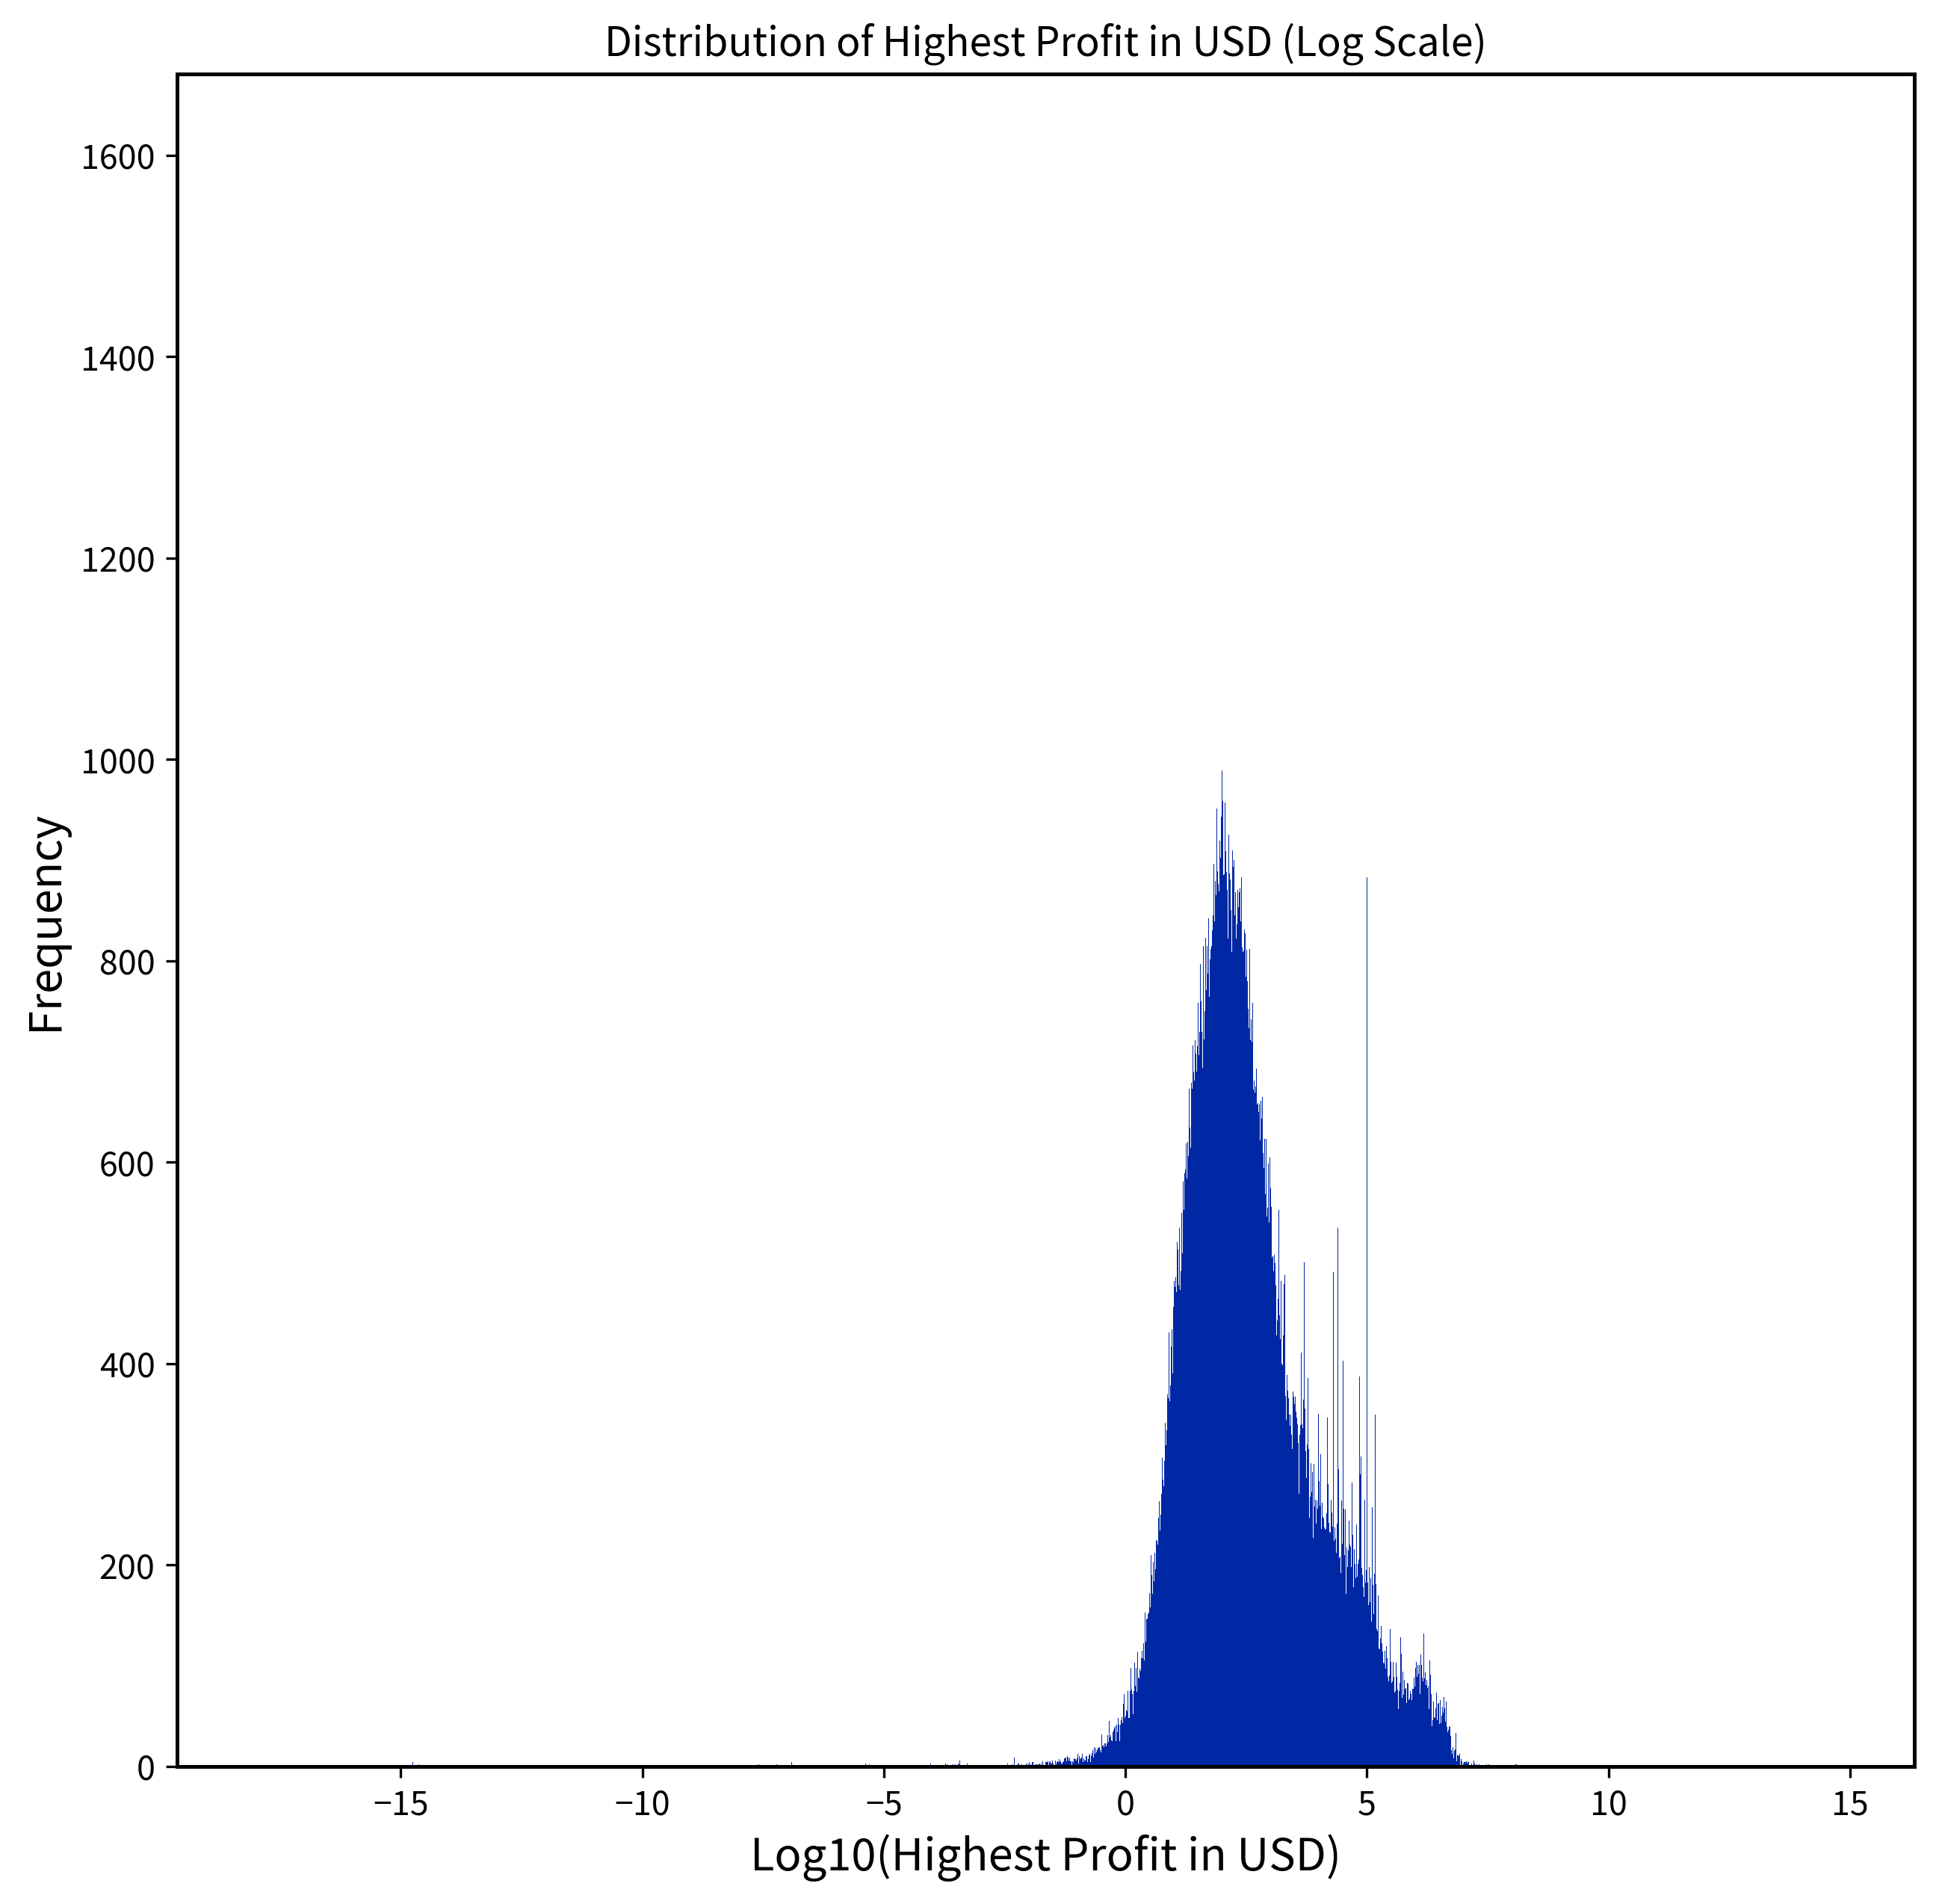

In [32]:
# Load the data
Uniswap_v2_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Uniswap_v2_ABC.csv')
Uniswap_v3_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Uniswap_v3_ABC.csv')
Aave_v2_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Aave_v2_ABC.csv')
Aave_v3_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Aave_v3_ABC.csv')
Balancer_v2_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Balancer_v2_ABC.csv')

# Merge dataframes
merged_flashloan_df = pd.concat([Uniswap_v2_df, Uniswap_v3_df, Aave_v2_df, Aave_v3_df, Balancer_v2_df], ignore_index=True)

# Filter the 'highest_profit_in_usd' column for values greater than 0
filtered_data = merged_flashloan_df['highest_profit_in_usd']
filtered_data = filtered_data[filtered_data > 0]

# Create the histogram on a log scale and get counts and bin edges
counts, bin_edges = np.histogram(np.log10(filtered_data), bins=10000)

# Create a list of tuples containing frequency and original bin range
frequency_ranges = []
for i in range(len(counts)):
    if counts[i] > 0:  # Only consider bins with non-zero frequency
        original_range = (10 ** bin_edges[i], 10 ** bin_edges[i + 1])
        frequency_ranges.append((counts[i], original_range))

# Sort the list by frequency in descending order
sorted_frequency_ranges = sorted(frequency_ranges, key=lambda x: x[0], reverse=True)

# Print the sorted frequencies with their respective ranges
print("Frequency (Highest to Lowest) with Original Ranges:")
for frequency, original_range in sorted_frequency_ranges:
    print(f'Frequency: {frequency}, Range: {original_range}')

# Create the histogram plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(np.log10(filtered_data), bins=10000)

ax.set_title('Distribution of Highest Profit in USD (Log Scale)')
ax.set_xlabel('Log10(Highest Profit in USD)')
ax.set_ylabel('Frequency')

# Save the figure
fig.savefig('/home/user/gzhao/Thesis/result/Distribution_of_Highest_Profit_in_USD_Log_Scale.pdf')

plt.show()


/tmp/ipykernel_1783193/500541088.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  len(pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Balancer_v2_flashloan_unique.csv'))


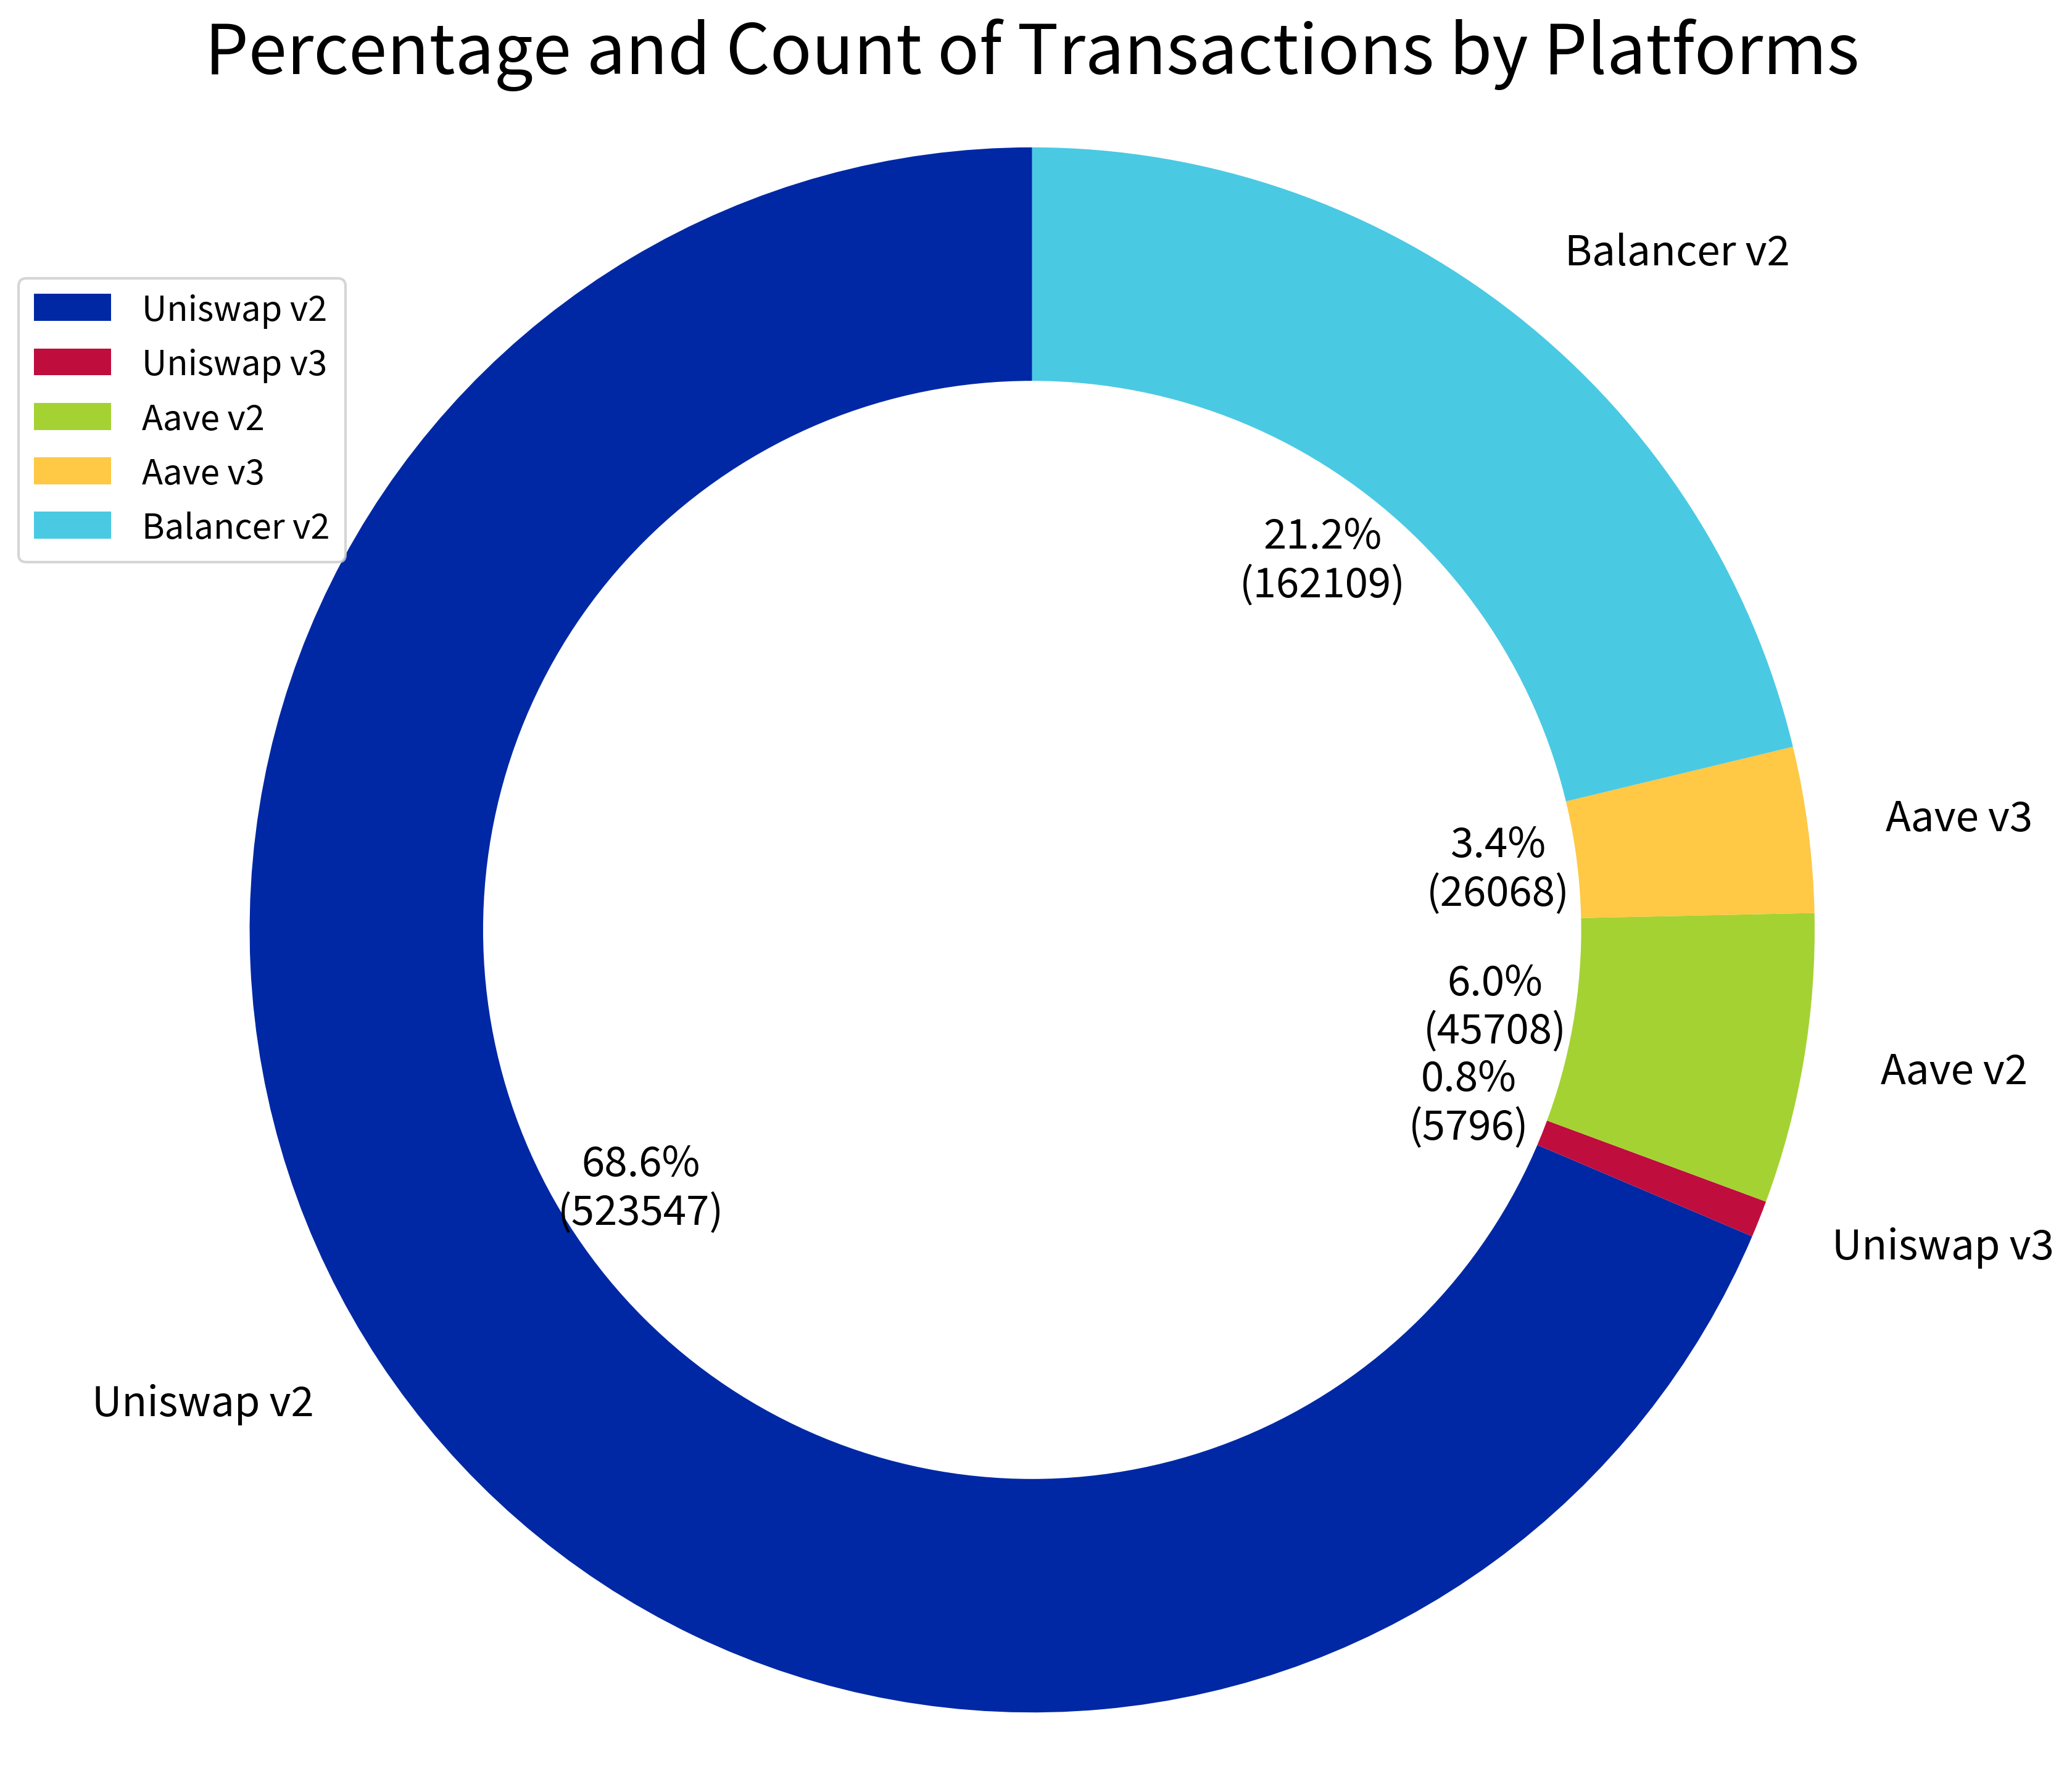

In [34]:
counts = [
    len(pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Uniswap_v2_flashloan_unique.csv')),
    len(pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Uniswap_v3_flashloan_unique.csv')),
    len(pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Aave_v2_flashloan_unique.csv')),
    len(pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Aave_v3_flashloan_unique.csv')),
    len(pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Balancer_v2_flashloan_unique.csv'))
]
labels = ['Uniswap v2', 'Uniswap v3', 'Aave v2', 'Aave v3', 'Balancer v2']

# Function to display both the count and percentage
def autopct_format(pct, all_values):
    total = sum(all_values)
    absolute = int(pct / 100. * total)
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots(figsize=(12, 12))

# Pie chart with larger text size
ax.pie(
    counts, 
    labels=labels, 
    autopct=lambda pct: autopct_format(pct, counts), 
    startangle=90, 
    wedgeprops={'width': 0.4},
    textprops={'fontsize': 18}  # Set font size for the labels and percentages
)

# Add a white circle in the center for the donut effect
center_circle = plt.Circle((0, 0), 0.70, color='white')
ax.add_artist(center_circle)

ax.axis('equal')

# Customize legend position and font size
ax.legend(
    loc='upper left',  # Move legend to the top-left corner
    fontsize=15,       # Set font size for the legend
    bbox_to_anchor=(-0.1, 0.9)  # Adjust position relative to the plot
)

# Customize title font size
ax.set_title('Percentage and Count of Transactions by Platforms', fontsize=30)

# Save the figure
fig.savefig('/home/user/gzhao/Thesis/result/Donut_chart_Transaction_Count_and_Percentage.pdf', facecolor='white', transparent=False)

plt.show()


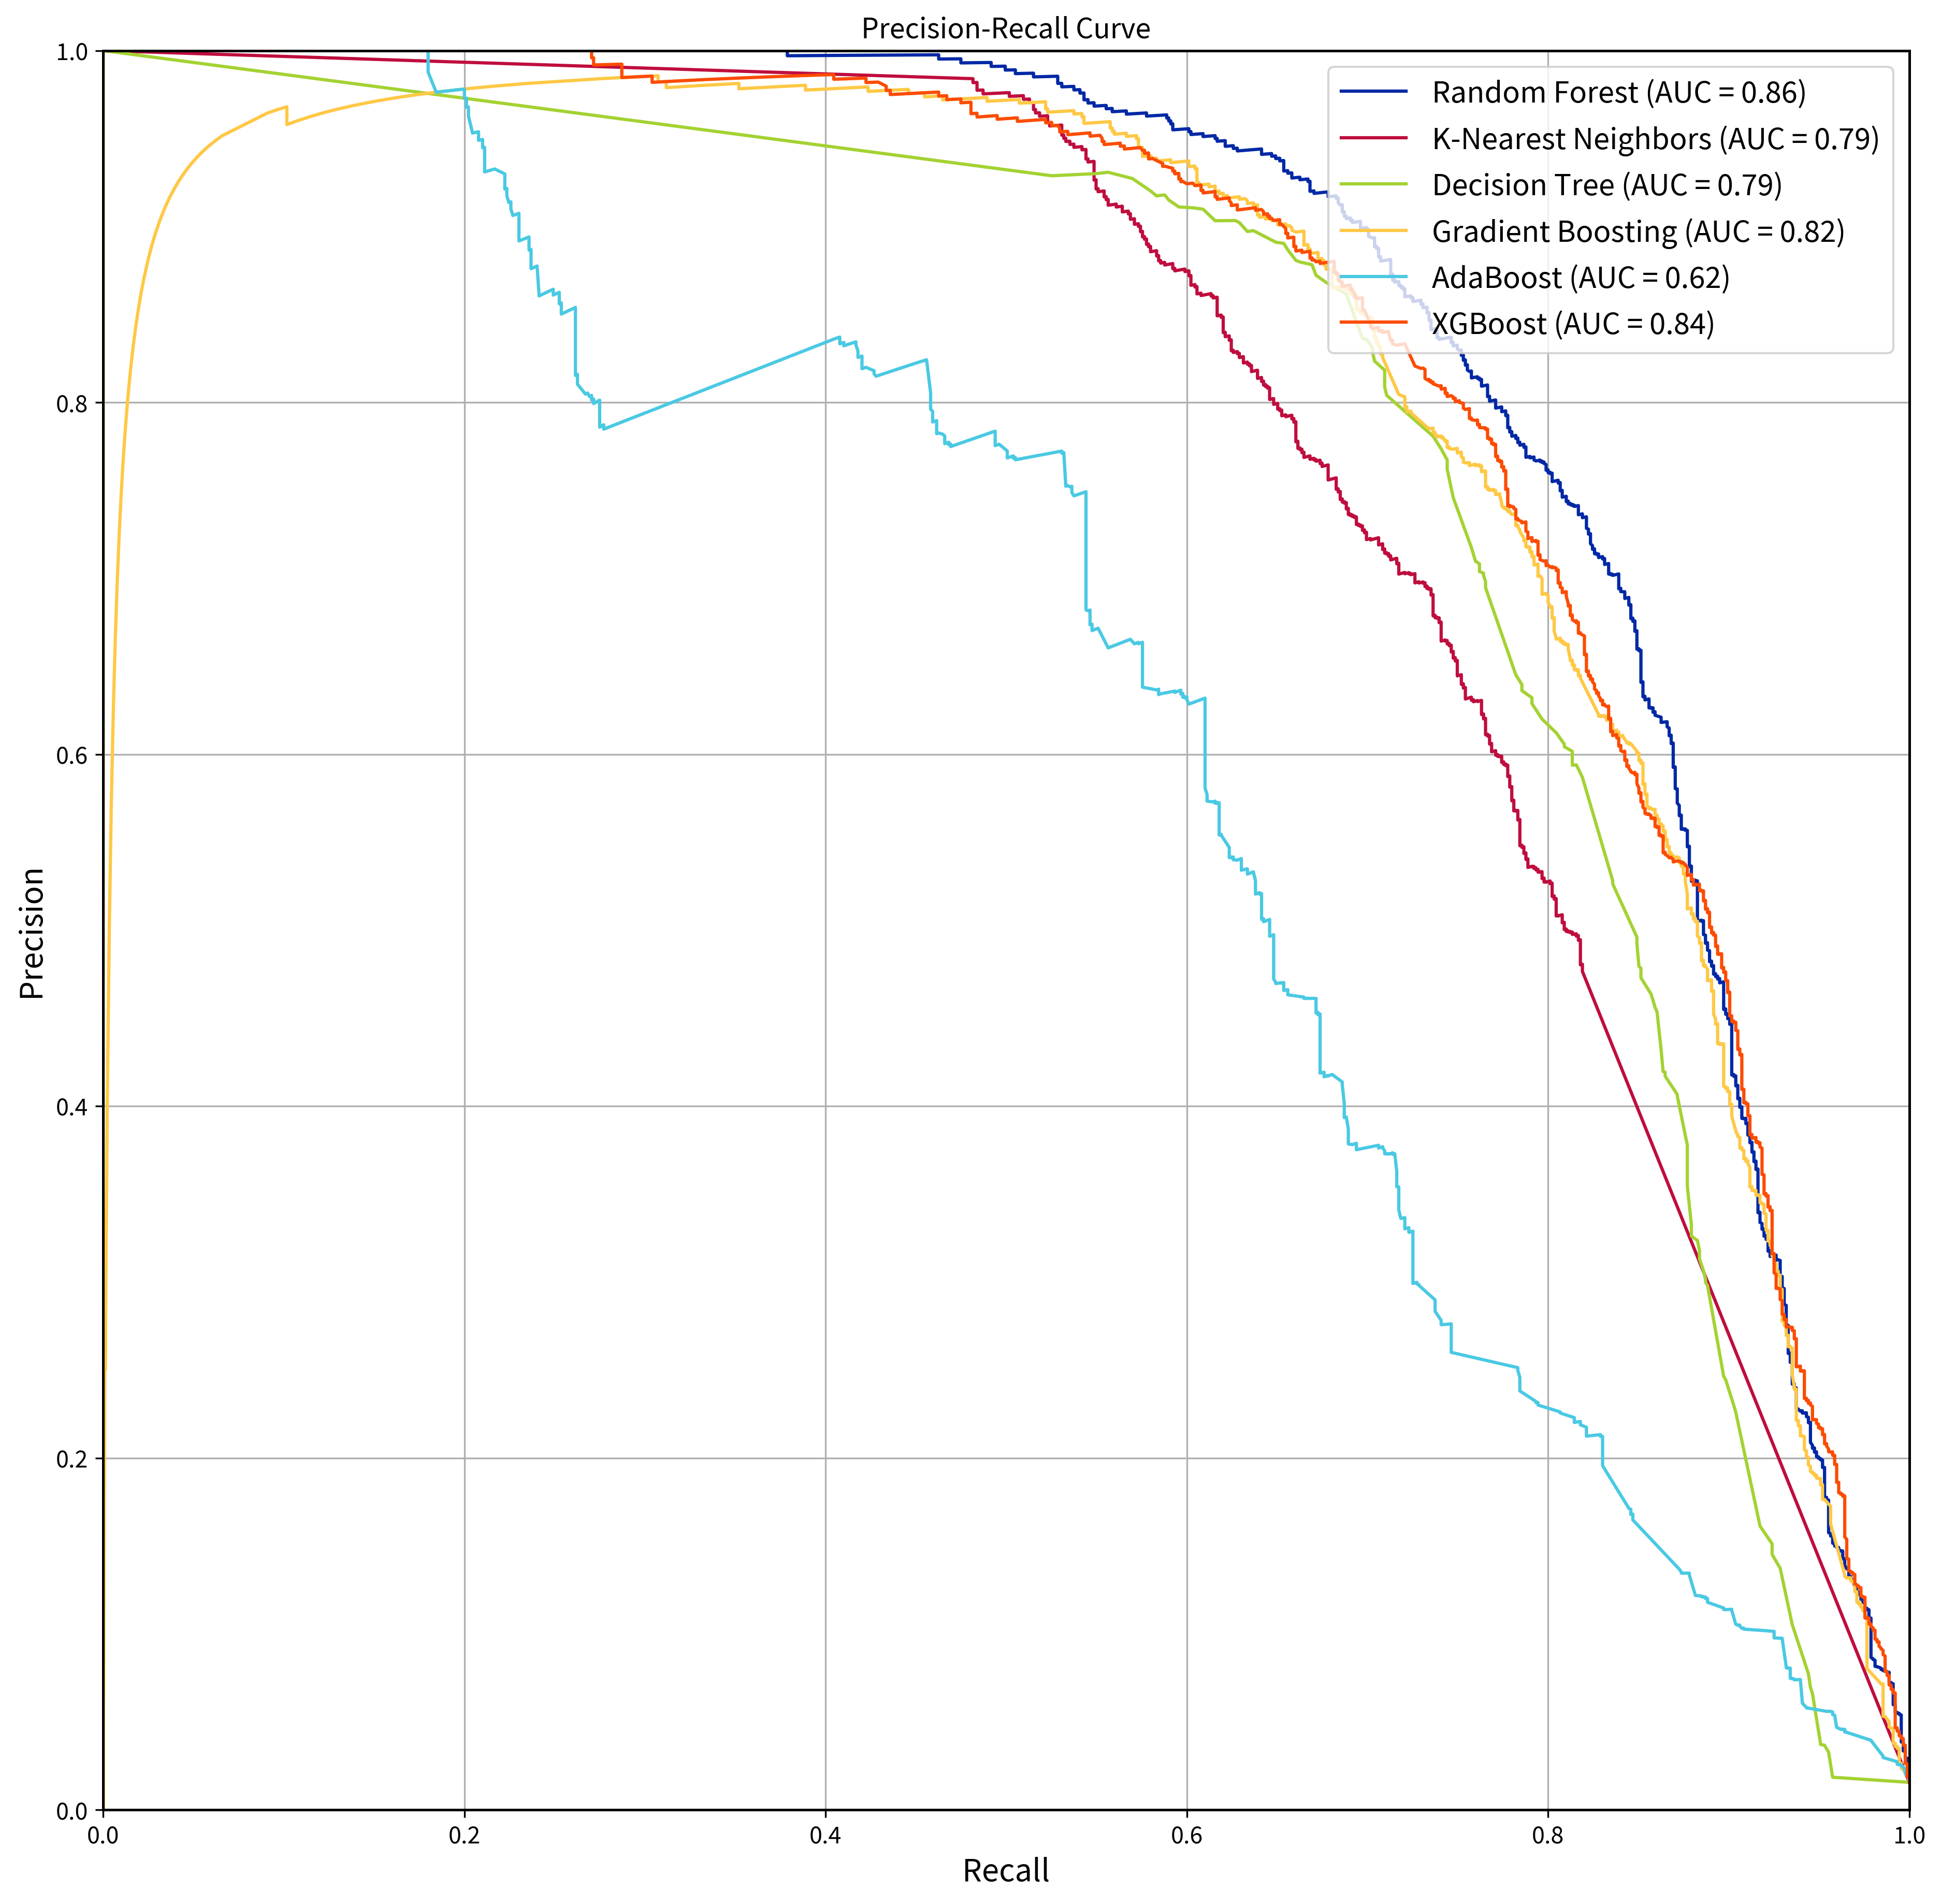

In [43]:
from sklearn.metrics import auc

# Load Precision-Recall data
rf_pr_df = pd.read_csv('Models/random_forest_precision_recall_data.csv')
knn_pr_df = pd.read_csv('Models/knn_precision_recall_data.csv')
dt_pr_df = pd.read_csv('Models/decision_tree_precision_recall_data.csv')
gb_pr_df = pd.read_csv('Models/gradient_boosting_precision_recall_data.csv')
ada_pr_df = pd.read_csv('Models/adaboost_precision_recall_data.csv')
xg_pr_df = pd.read_csv('Models/xgboost_precision_recall_data.csv')

# Calculate AUC for Precision-Recall curves
rf_pr_auc = auc(rf_pr_df['Recall'], rf_pr_df['Precision'])
knn_pr_auc = auc(knn_pr_df['Recall'], knn_pr_df['Precision'])
dt_pr_auc = auc(dt_pr_df['Recall'], dt_pr_df['Precision'])
gb_pr_auc = auc(gb_pr_df['Recall'], gb_pr_df['Precision'])
ada_pr_auc = auc(ada_pr_df['Recall'], ada_pr_df['Precision'])
xg_pr_auc = auc(xg_pr_df['Recall'], xg_pr_df['Precision'])

# Plot Precision-Recall curves with AUC in the legend
fig, ax = plt.subplots(figsize=(15, 15))

ax.plot(rf_pr_df['Recall'], rf_pr_df['Precision'], label=f'Random Forest (AUC = {rf_pr_auc:.2f})')
ax.plot(knn_pr_df['Recall'], knn_pr_df['Precision'], label=f'K-Nearest Neighbors (AUC = {knn_pr_auc:.2f})')
ax.plot(dt_pr_df['Recall'], dt_pr_df['Precision'], label=f'Decision Tree (AUC = {dt_pr_auc:.2f})')
ax.plot(gb_pr_df['Recall'], gb_pr_df['Precision'], label=f'Gradient Boosting (AUC = {gb_pr_auc:.2f})')
ax.plot(ada_pr_df['Recall'], ada_pr_df['Precision'], label=f'AdaBoost (AUC = {ada_pr_auc:.2f})')
ax.plot(xg_pr_df['Recall'], xg_pr_df['Precision'], label=f'XGBoost (AUC = {xg_pr_auc:.2f})')

# Add labels and title
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc='upper right', fontsize=15)
ax.grid()
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

# Save and show the plot
fig.savefig('/home/user/gzhao/Thesis/result/precision_recall_curve.pdf', facecolor='white', transparent=False)
plt.show()


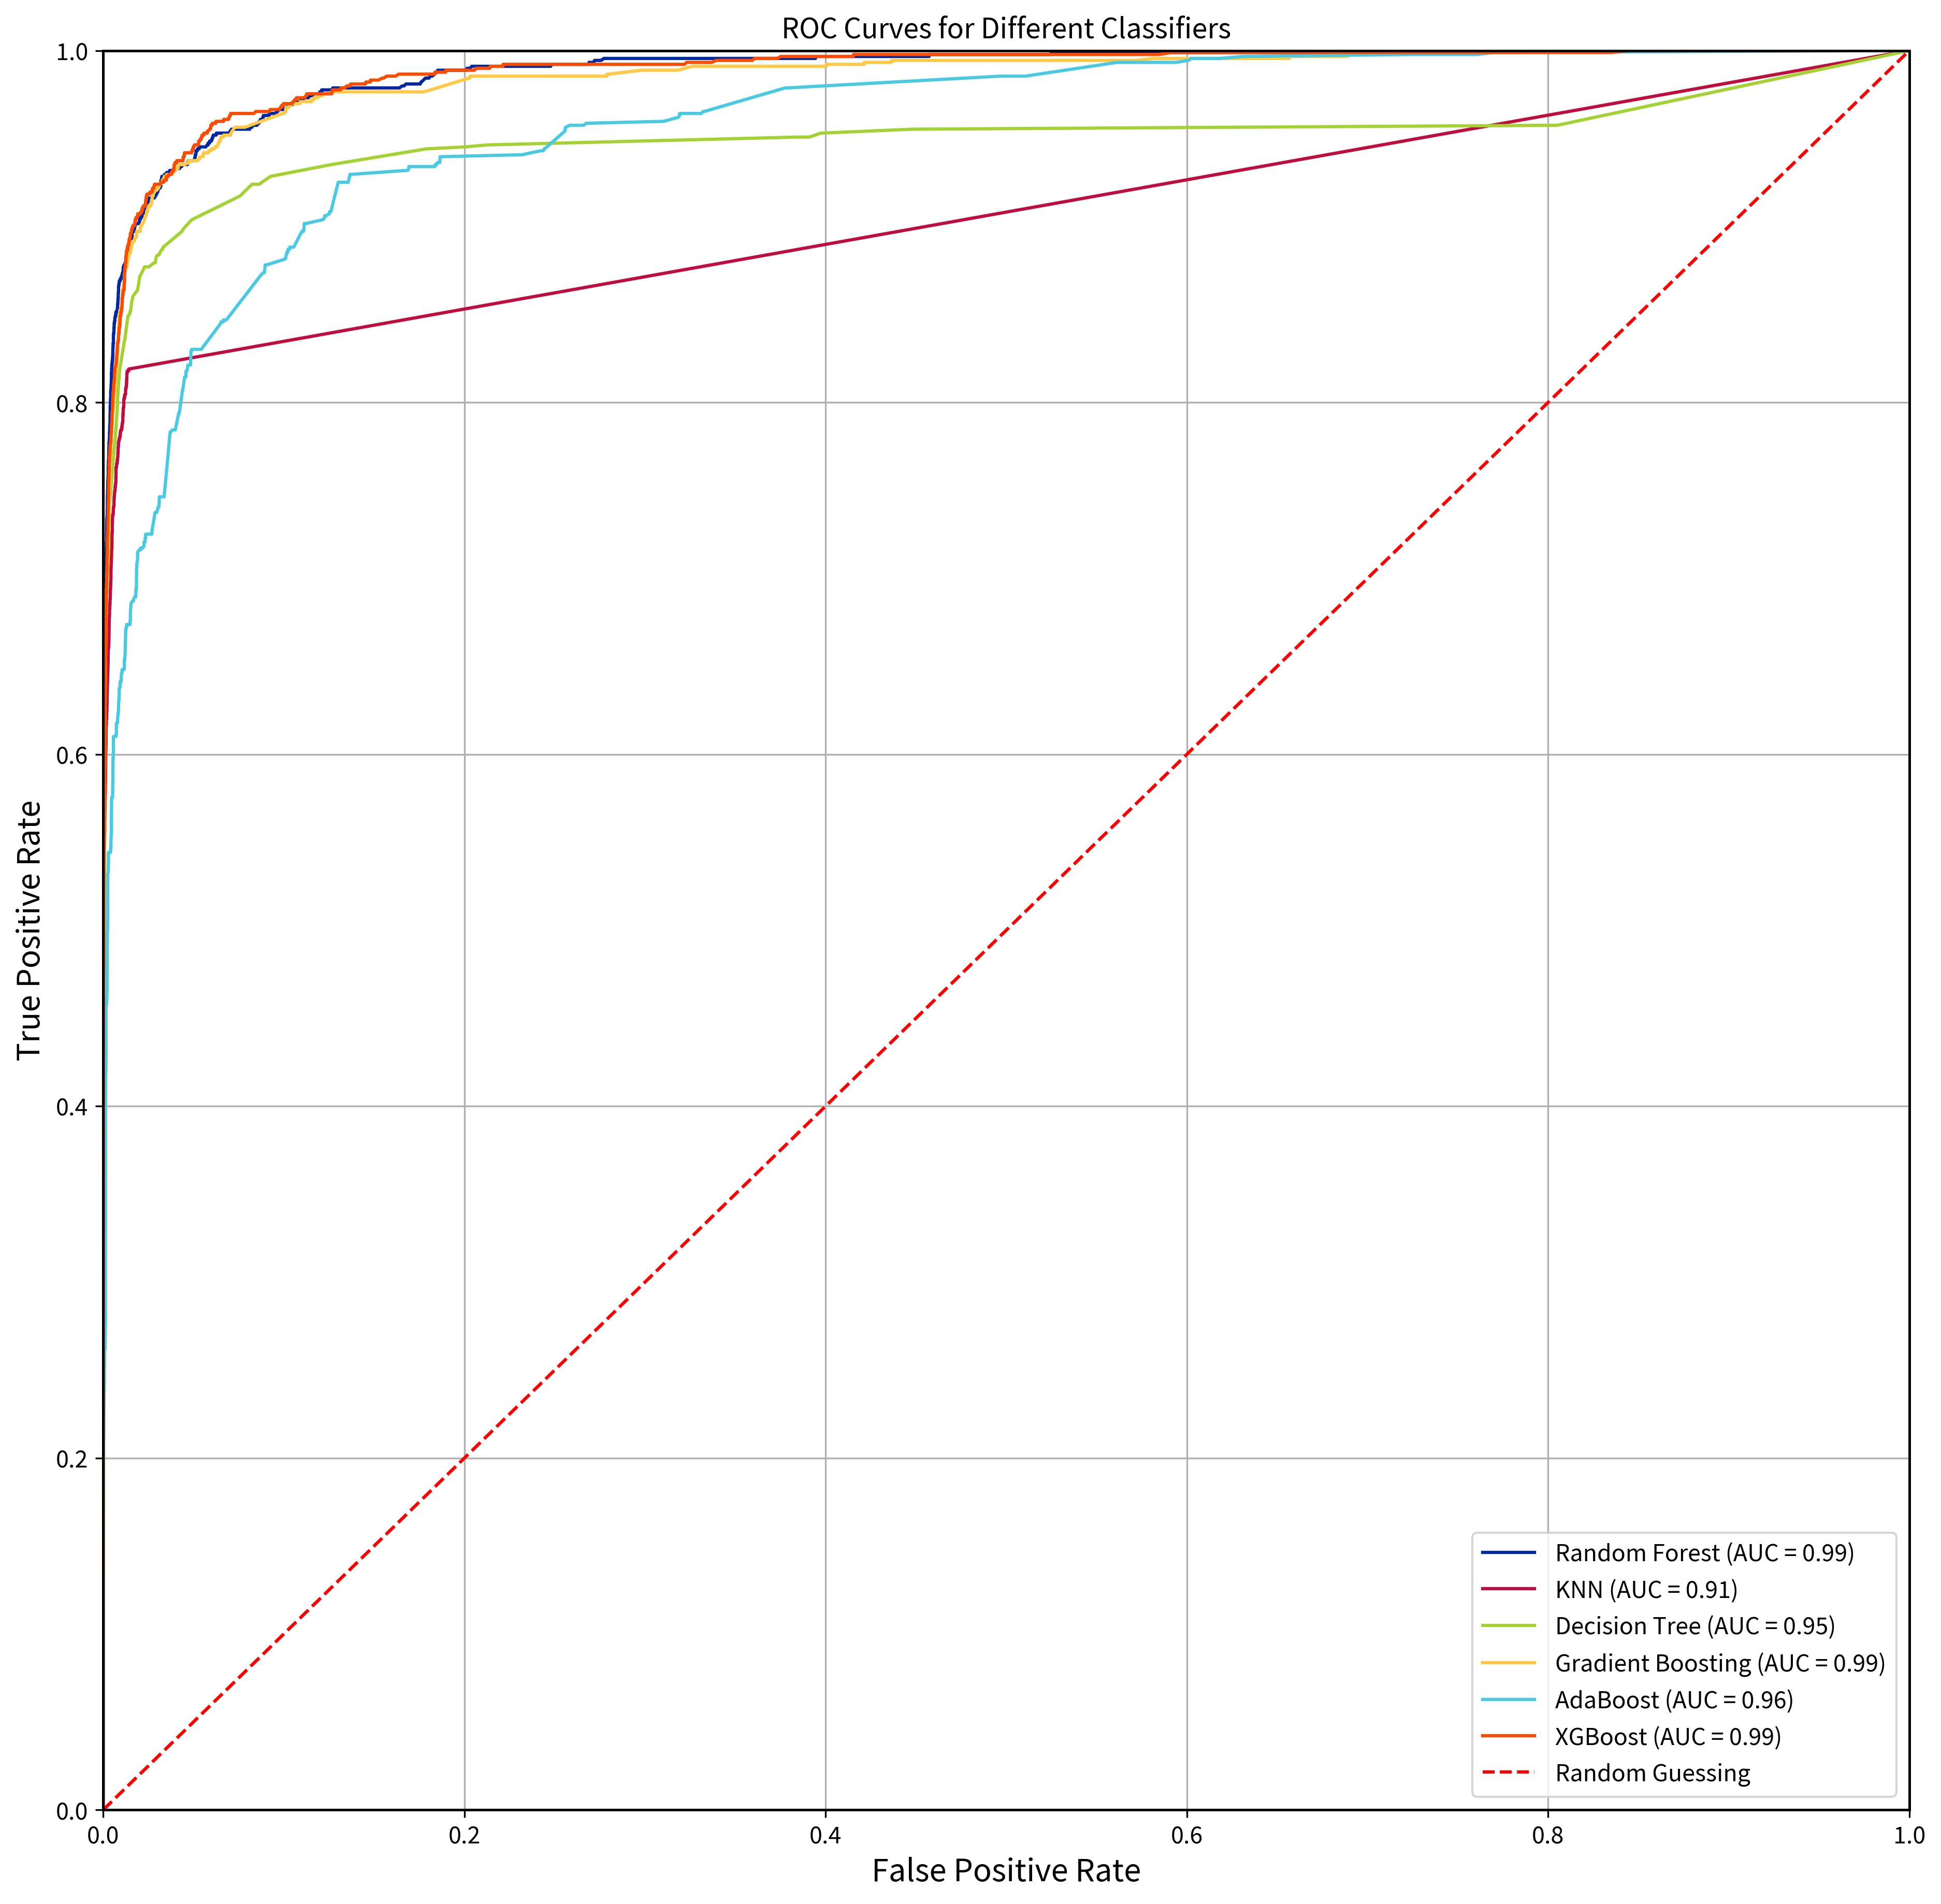

In [44]:
rf_roc_df = pd.read_csv('Models/random_forest_roc_data.csv')
knn_roc_df = pd.read_csv('Models/knn_roc_data.csv')
dt_roc_df = pd.read_csv('Models/decision_tree_roc_data.csv')
gb_roc_df = pd.read_csv('Models/gradient_boosting_roc_data.csv')
ada_roc_df = pd.read_csv('Models/adaboost_roc_data.csv')
xg_roc_df = pd.read_csv('Models/xgboost_roc_data.csv')

rf_metrics_df = pd.read_csv('Models/random_forest_metrics.csv')
knn_metrics_df = pd.read_csv('Models/knn_metrics.csv')
dt_metrics_df = pd.read_csv('Models/decision_tree_metrics.csv')
gb_metrics_df = pd.read_csv('Models/gradient_boosting_metrics.csv')
ada_metrics_df = pd.read_csv('Models/adaboost_metrics.csv')
xg_metrics_df = pd.read_csv('Models/xgboost_metrics.csv')

rf_auc_value = rf_metrics_df.loc[rf_metrics_df['Metric'] == 'AUC-ROC', 'Value'].values[0]
knn_auc_value = knn_metrics_df.loc[knn_metrics_df['Metric'] == 'AUC-ROC', 'Value'].values[0]
dt_auc_value = dt_metrics_df.loc[dt_metrics_df['Metric'] == 'AUC-ROC', 'Value'].values[0]
gb_auc_value = gb_metrics_df.loc[gb_metrics_df['Metric'] == 'AUC-ROC', 'Value'].values[0]
ada_auc_value = ada_metrics_df.loc[ada_metrics_df['Metric'] == 'AUC-ROC', 'Value'].values[0]
xg_auc_value = xg_metrics_df.loc[xg_metrics_df['Metric'] == 'AUC-ROC', 'Value'].values[0]

fig, ax = plt.subplots(figsize=(15, 15))

ax.plot(rf_roc_df['False Positive Rate'], rf_roc_df['True Positive Rate'], label=f'Random Forest (AUC = {rf_auc_value:.2f})')
ax.plot(knn_roc_df['False Positive Rate'], knn_roc_df['True Positive Rate'], label=f'KNN (AUC = {knn_auc_value:.2f})')
ax.plot(dt_roc_df['False Positive Rate'], dt_roc_df['True Positive Rate'], label=f'Decision Tree (AUC = {dt_auc_value:.2f})')
ax.plot(gb_roc_df['False Positive Rate'], gb_roc_df['True Positive Rate'], label=f'Gradient Boosting (AUC = {gb_auc_value:.2f})')
ax.plot(ada_roc_df['False Positive Rate'], ada_roc_df['True Positive Rate'], label=f'AdaBoost (AUC = {ada_auc_value:.2f})')
ax.plot(xg_roc_df['False Positive Rate'], xg_roc_df['True Positive Rate'], label=f'XGBoost (AUC = {xg_auc_value:.2f})')

# Plot diagonal line for random guessing
ax.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guessing')

# Add labels and title
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curves for Different Classifiers')
ax.legend()
ax.grid()
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

fig.savefig('/home/user/gzhao/Thesis/result/ROC_Curves.pdf', facecolor='white', transparent=False)

# Show the plot
plt.show()

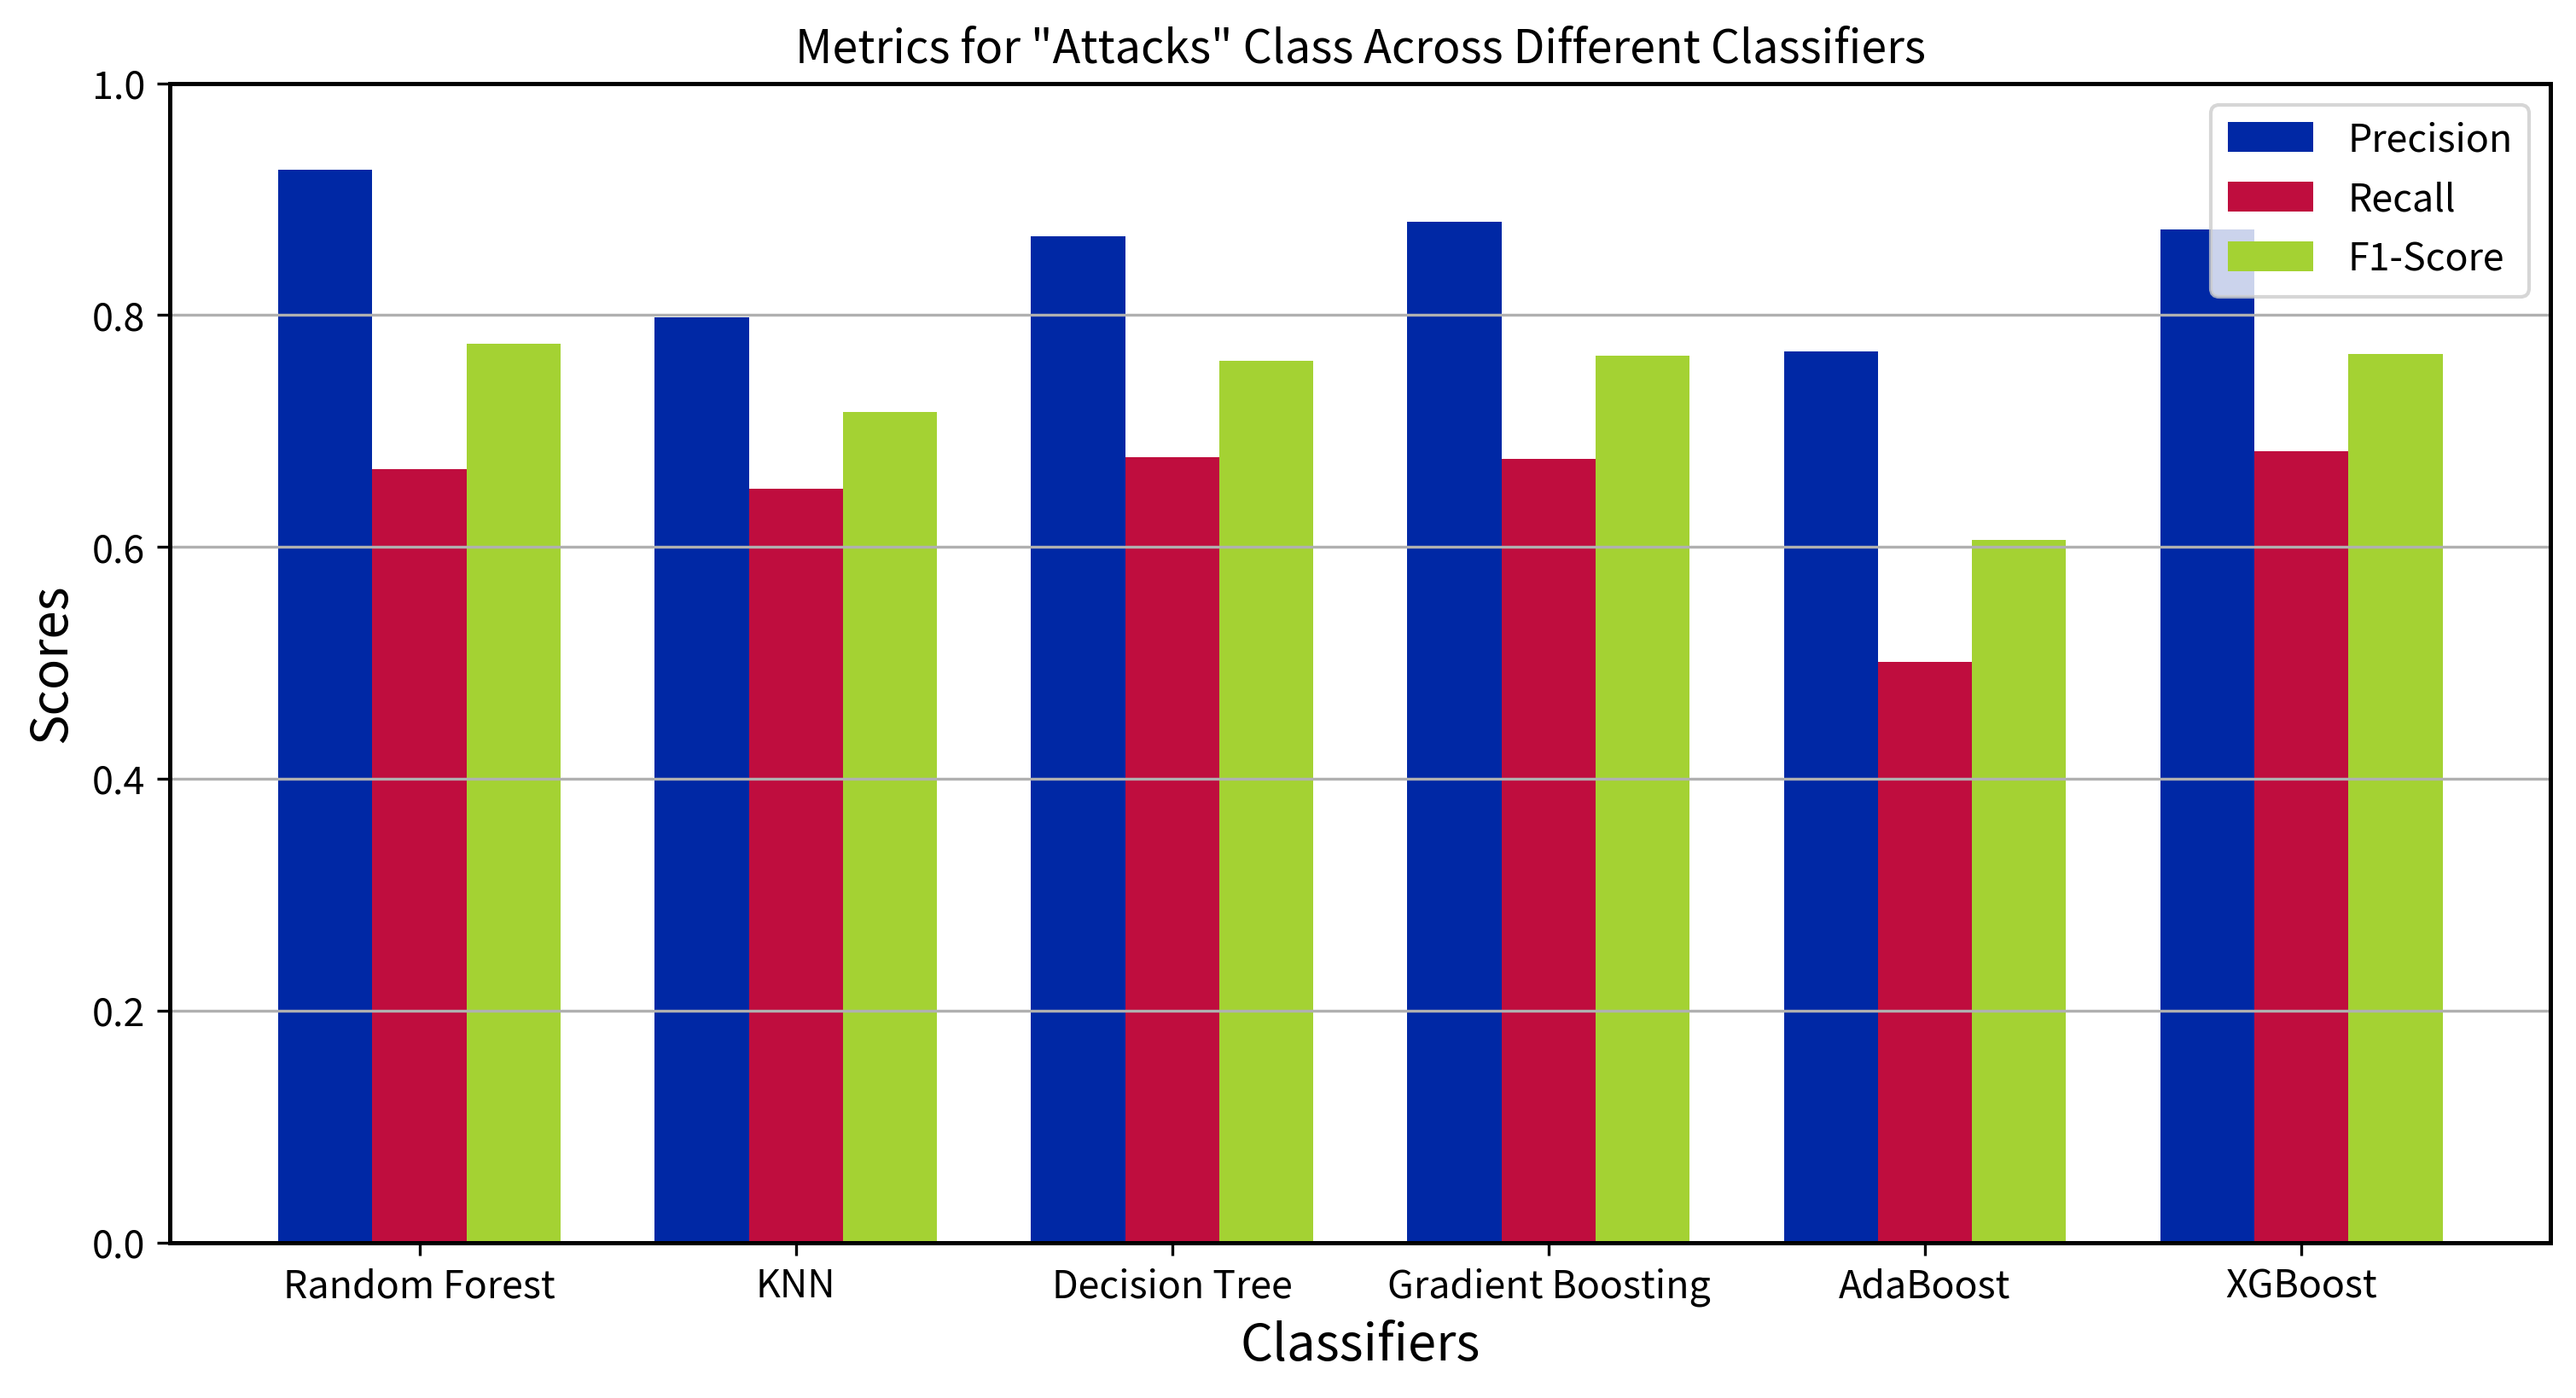

In [37]:
# Extract metrics for the 'Attacks' class (1)
metrics = {
    'Classifier': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

# Function to extract metrics for a given classifier's metrics DataFrame
def extract_metrics(metrics_df, classifier_name):
    precision = metrics_df.loc[metrics_df['Metric'] == f'Precision (1)', 'Value'].values[0]
    recall = metrics_df.loc[metrics_df['Metric'] == f'Recall (1)', 'Value'].values[0]
    f1_score = metrics_df.loc[metrics_df['Metric'] == f'F1-Score (1)', 'Value'].values[0]
    
    metrics['Classifier'].append(classifier_name)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1-Score'].append(f1_score)

# Extract metrics for each classifier
extract_metrics(rf_metrics_df, 'Random Forest')
extract_metrics(knn_metrics_df, 'KNN')
extract_metrics(dt_metrics_df, 'Decision Tree')
extract_metrics(gb_metrics_df, 'Gradient Boosting')
extract_metrics(ada_metrics_df, 'AdaBoost')
extract_metrics(xg_metrics_df, 'XGBoost')

# Convert metrics to DataFrame
metrics_df = pd.DataFrame(metrics)

# Set the bar width and positions for each metric
bar_width = 0.25
positions = range(len(metrics_df))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each metric with offset
ax.bar(positions, metrics_df['Precision'], width=bar_width, label='Precision')
ax.bar([p + bar_width for p in positions], metrics_df['Recall'], width=bar_width, label='Recall')
ax.bar([p + bar_width * 2 for p in positions], metrics_df['F1-Score'], width=bar_width, label='F1-Score')

# Add labels and title
ax.set_xlabel('Classifiers')
ax.set_ylabel('Scores')
ax.set_title('Metrics for "Attacks" Class Across Different Classifiers')
ax.set_xticks([p + bar_width for p in positions])  # Set x-ticks to the center of the grouped bars
ax.set_xticklabels(metrics_df['Classifier'])
ax.legend()
ax.grid(axis='y')
ax.set_ylim(0, 1)  # Set y-axis limits

fig.savefig('/home/user/gzhao/Thesis/result/Metrics.pdf', facecolor='white', transparent=False)

# Show the plot
plt.show()

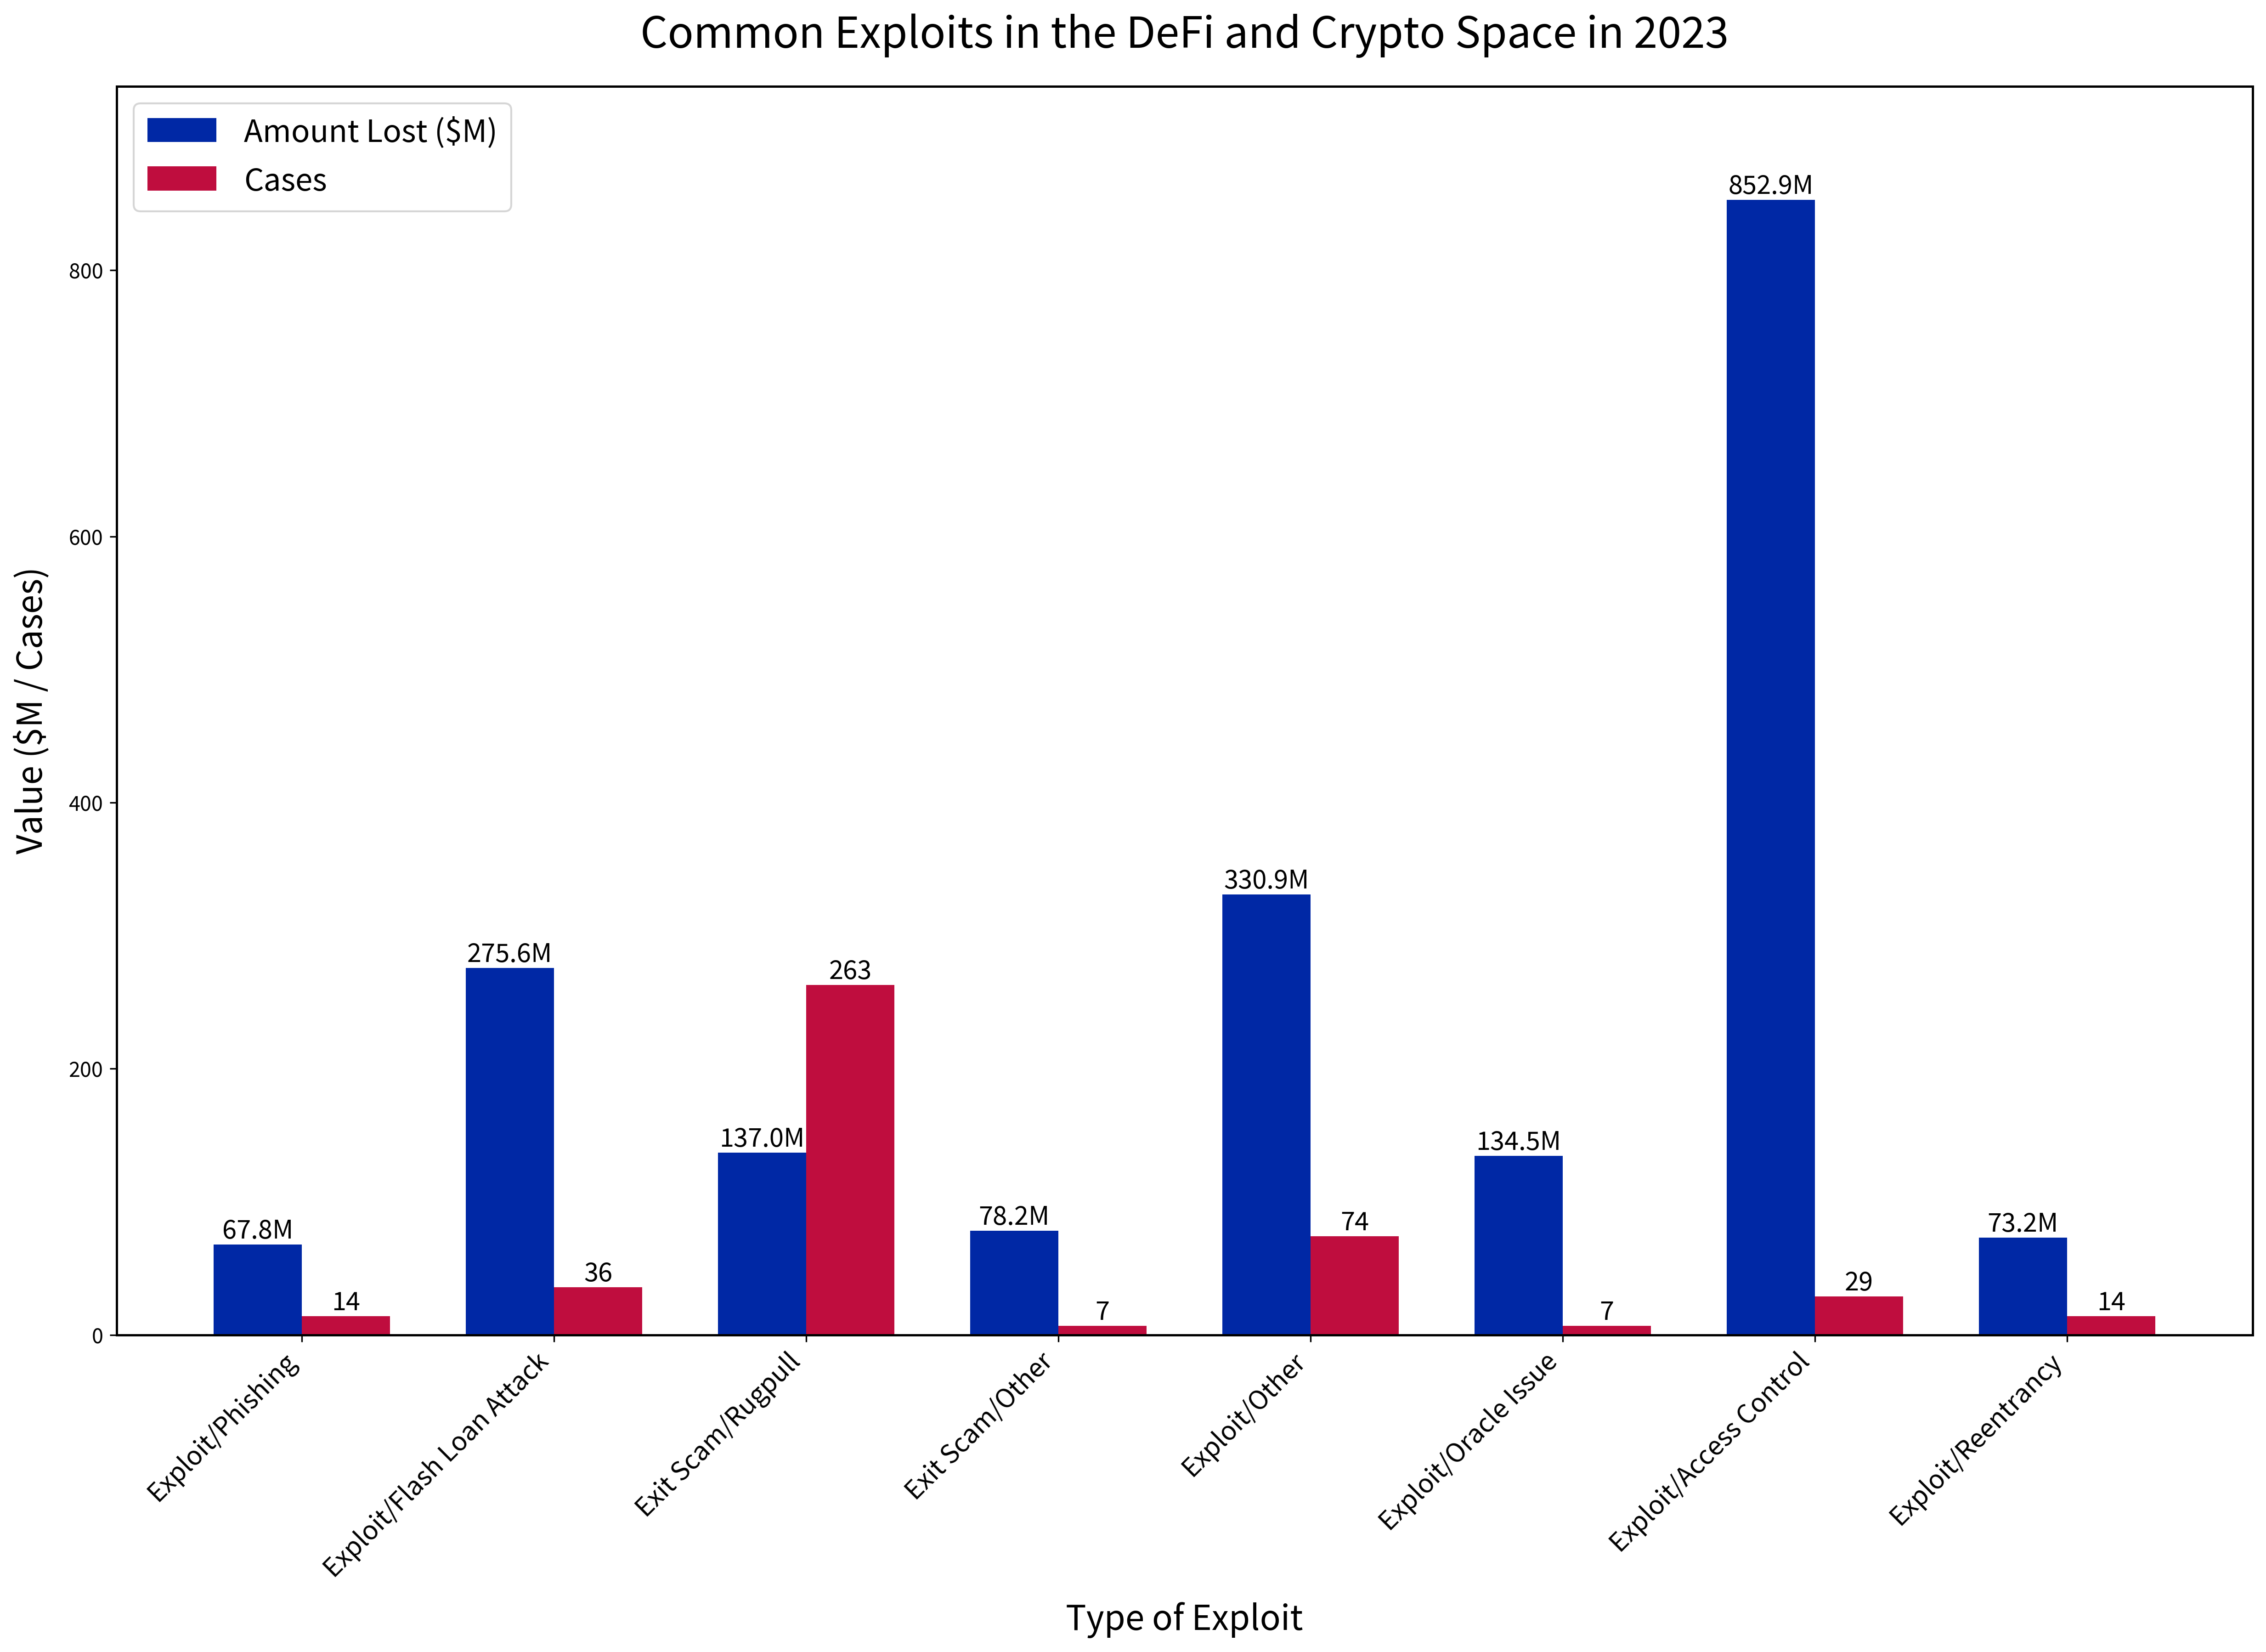

In [38]:
data = {
    "Type of Exploit": [
        "Exploit/Phishing",
        "Exploit/Flash Loan Attack",
        "Exit Scam/Rugpull",
        "Exit Scam/Other",
        "Exploit/Other",
        "Exploit/Oracle Issue",
        "Exploit/Access Control",
        "Exploit/Reentrancy",
    ],
    "Cases": [14, 36, 263, 7, 74, 7, 29, 14],
    "Amount Lost ($M)": [
        67.824655,
        275.594997,
        136.991987,
        78.232623,
        330.922107,
        134.479921,
        852.896976,
        73.158394,
    ],
}

df = pd.DataFrame(data)

bar_width = 0.35
index = np.arange(len(df))

fig, ax = plt.subplots(figsize=(20, 12))

bars_amount = ax.bar(index, df['Amount Lost ($M)'], bar_width, label='Amount Lost ($M)')
bars_cases = ax.bar(index + bar_width, df['Cases'], bar_width, label='Cases')

ax.set_title("Common Exploits in the DeFi and Crypto Space in 2023", fontsize=25, pad=20)
ax.set_xlabel("Type of Exploit", fontsize=20, labelpad=10)
ax.set_ylabel("Value ($M / Cases)", fontsize=20, labelpad=10)

ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df['Type of Exploit'], rotation=45, ha="right", fontsize=15)

ax.set_ylim(0, max(df['Amount Lost ($M)'].max(), df['Cases'].max()) * 1.1)

for bars in [bars_amount, bars_cases]:
    for bar in bars:
        height = bar.get_height()
        if bars is bars_amount:
            ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}M', ha='center', va='bottom', fontsize=15, color='black')
        else:
            ax.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=15, color='black')

ax.legend(loc='upper left', fontsize=18, ncol=1)

fig.savefig('/home/user/gzhao/Thesis/result/exploits_and_loss_2023.pdf', facecolor='white', transparent=False)
plt.show()